In [15]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import geopandas as gpd
import matplotlib.image as mpimg
from shapely.geometry import Point, LineString

In [3]:
# Read in the excel file 'randstad.xlsx' as a dataframe
randstad_network = pd.read_excel('randstad.xlsx')
# Show contents of the dataframe
randstad_network

,weight,0,b
0,42.4,Amsterdam,Utrecht
1,45.8,Leiden,Amsterdam
2,20.5,Den Haag,Leiden
3,33.4,Gouda,Den Haag
4,22.8,Woerden,Gouda
5,27.8,Utrecht,Woerden
6,10.9,Den Haag,Delft


In [4]:
# Make a graph from the dataframe
Randstad_Graph=nx.from_pandas_edgelist(randstad_network, 0, 'b', ['weight'])

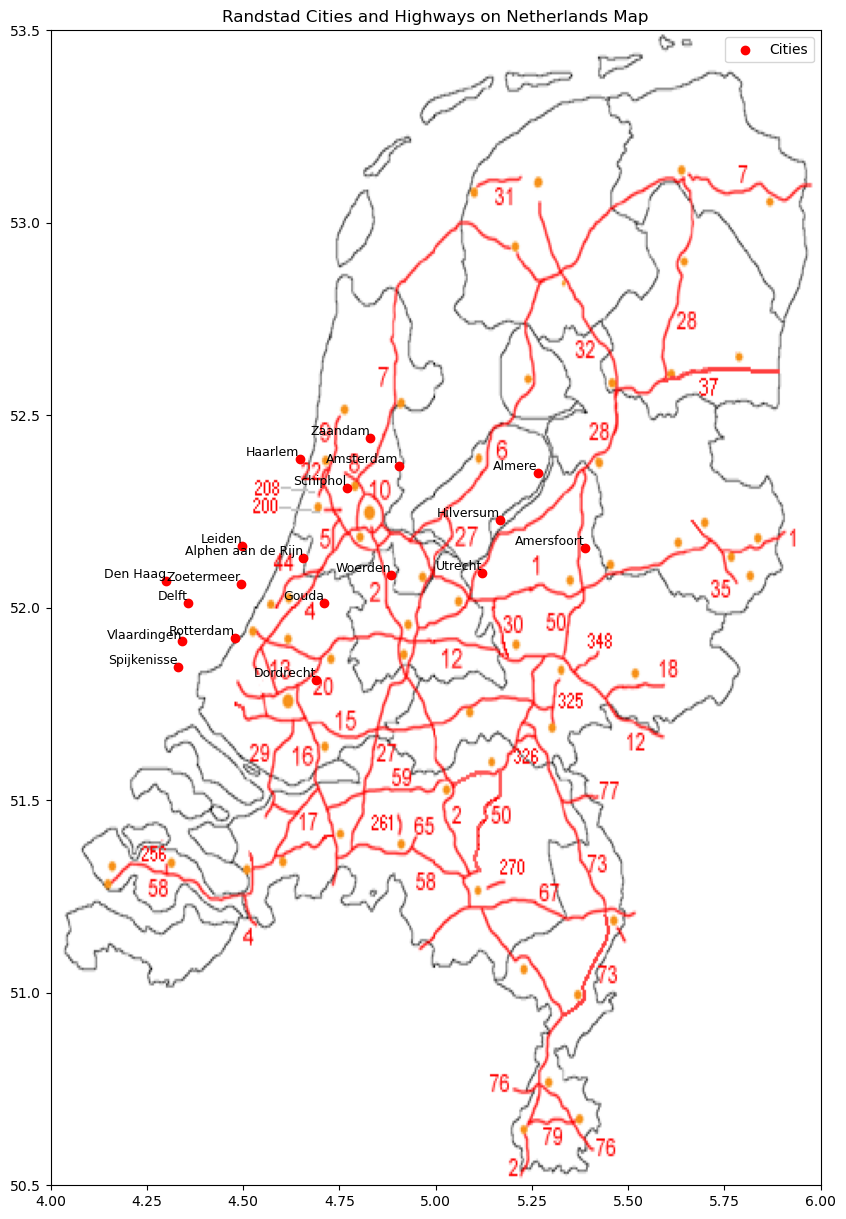

In [27]:
# Your cities and their geographical coordinates
cities_coords = {
    "Zaandam": (52.442, 4.829),
    "Amsterdam": (52.3676, 4.9041),
    "Haarlem": (52.3874, 4.6462),
    "Schiphol": (52.3105, 4.7683),
    "Leiden": (52.1601, 4.4970),
    "Den Haag": (52.0705, 4.3007),
    "Zoetermeer": (52.0607, 4.4940),
    "Delft": (52.0116, 4.3571),
    "Rotterdam": (51.9225, 4.4792),
    "Spijkenisse": (51.8453, 4.3297),
    "Dordrecht": (51.8133, 4.6901),
    "Vlaardingen": (51.9125, 4.3417),
    "Alphen aan de Rijn": (52.1292, 4.6555),
    "Gouda": (52.0116, 4.7105),
    "Woerden": (52.0850, 4.8836),
    "Utrecht": (52.0907, 5.1214),
    "Hilversum": (52.2292, 5.1669),
    "Almere": (52.3508, 5.2647),
    "Amersfoort": (52.1561, 5.3878),
}

connections = [
    # Add connections here
]
    
# Convert your city coordinates to a GeoDataFrame
gdf_cities = gpd.GeoDataFrame({
    'city': cities_coords.keys(),
    'geometry': [Point(xy[1], xy[0]) for xy in cities_coords.values()]  # Note the (longitude, latitude) order
})

# Create a GeoDataFrame for connections
gdf_connections = gpd.GeoDataFrame({
    'geometry': [LineString([Point(cities_coords[connection[0]]), Point(cities_coords[connection[1]])]) for connection in connections]
})
# Load the PNG image
img = mpimg.imread('SnelwegenNederland_2008.png')

# Create a single figure context for both the image and the plots
fig, ax = plt.subplots(figsize=(10, 15))

# Plot the image
#ax.imshow(img, extent=[4, 6, 50.5, 53.5])  # You might need to adjust the extent to fit your image
#ax.imshow(img, extent=[3, 7, 50.5, 53.5]) 
# Plot cities on top of the image
gdf_cities.plot(ax=ax, marker='o', color='red', label='Cities')
# Plot connections
gdf_connections.plot(ax=ax, color='blue', linestyle='-', linewidth=2, label='Highways')
# Annotate each city with its name
for city, coord in cities_coords.items():
    ax.text(coord[1], coord[0], city, fontsize=9, ha='right', va='bottom')

# Customize plot
ax.set_title('Randstad Cities and Highways on Netherlands Map')
plt.legend()

plt.show()

In [5]:
print(nx.nodes(Randstad_Graph))

['Amsterdam', 'Utrecht', 'Leiden', 'Den Haag', 'Gouda', 'Woerden', 'Delft']


In [6]:
dsp = nx.shortest_path(Randstad_Graph, source='Amsterdam', target='Delft')
print(dsp)

['Amsterdam', 'Leiden', 'Den Haag', 'Delft']


In [7]:
dspl = nx.shortest_path_length(Randstad_Graph, source='Amsterdam', target='Delft')
print(dspl)

3


In [8]:
dspl = nx.shortest_path_length(Randstad_Graph, source='Amsterdam', target='Delft',weight='weight')
print(dspl)

77.2


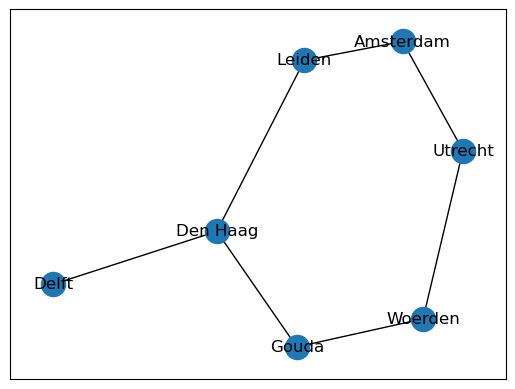

In [9]:
# Plot the graph
nx.draw_networkx(Randstad_Graph)

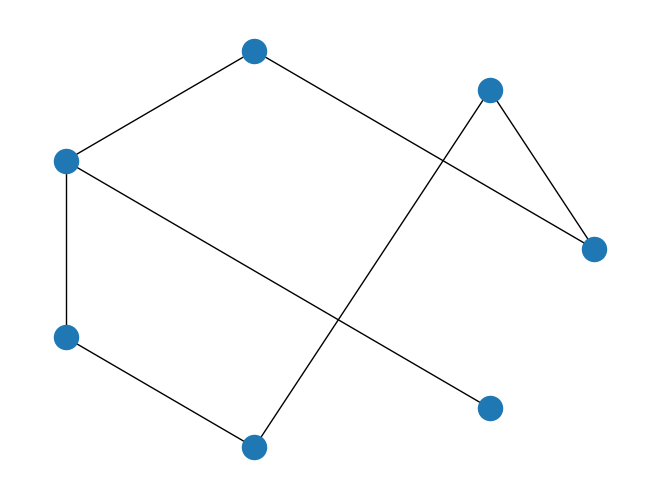

In [10]:
# Plot the graph, using a cicular layout
nx.draw_circular(Randstad_Graph)

In [11]:
#Calculate the betweenness centrality, don't normalize
betweenness = nx.betweenness_centrality(Randstad_Graph,k=None,normalized=False)
betweenness

{'Amsterdam': 2.5,
 'Utrecht': 2.0,
 'Leiden': 3.5,
 'Den Haag': 7.0,
 'Gouda': 3.5,
 'Woerden': 2.5,
 'Delft': 0.0}

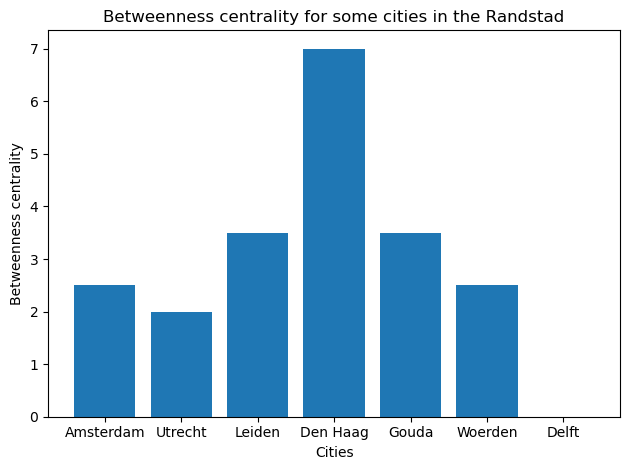

In [12]:
# Plot the values in a bar chart
plt.bar(range(len(betweenness)), betweenness.values(), align='center')
plt.xticks(range(len(betweenness)), list(betweenness.keys()))
plt.title("Betweenness centrality for some cities in the Randstad")
plt.xlabel("Cities")
plt.ylabel("Betweenness centrality")
plt.tight_layout()

In [13]:
#Calculate the weighted edge betweenness centrality, normalize
edge_betweenness_weigthed = nx.edge_betweenness_centrality(Randstad_Graph, 
                                                             k=None, 
                                                             normalized=True, 
                                                             weight='weight', 
                                                             seed=None)
edge_betweenness_weigthed

{('Amsterdam', 'Utrecht'): 0.19047619047619047,
 ('Amsterdam', 'Leiden'): 0.19047619047619047,
 ('Utrecht', 'Woerden'): 0.2857142857142857,
 ('Leiden', 'Den Haag'): 0.2857142857142857,
 ('Den Haag', 'Gouda'): 0.38095238095238093,
 ('Den Haag', 'Delft'): 0.2857142857142857,
 ('Gouda', 'Woerden'): 0.38095238095238093}

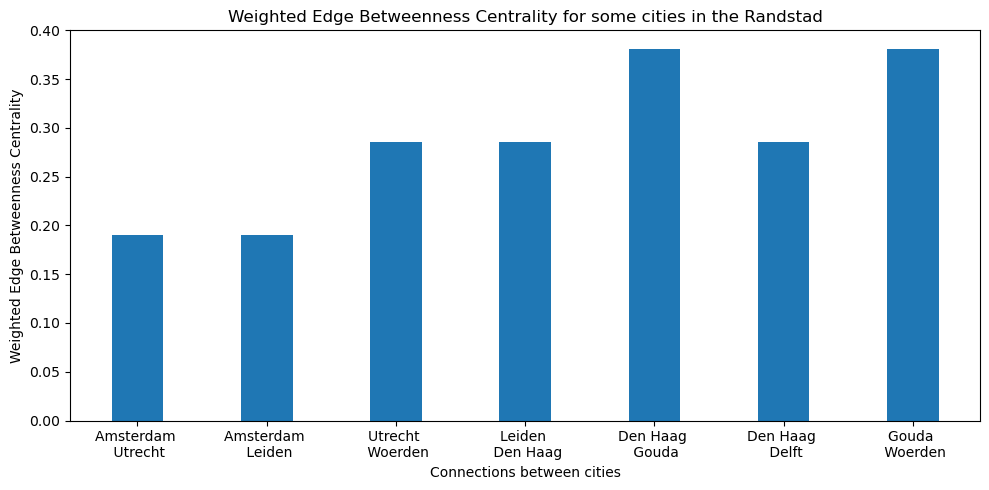

In [14]:
# Helper function for parsing the edge labels
def ppEdges (l):
    rl = []
    for i in range(len(l)):
        rl.append(str(l[i][0]) + ' \n ' + str(l[i][1]))
    return rl

# Plot the values in a bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(len(edge_betweenness_weigthed)), edge_betweenness_weigthed.values(), width=0.4)
plt.xticks(range(len(edge_betweenness_weigthed)), ppEdges(list(edge_betweenness_weigthed.keys())))
plt.title("Weighted Edge Betweenness Centrality for some cities in the Randstad")
plt.xlabel("Connections between cities")
plt.ylabel("Weighted Edge Betweenness Centrality")
plt.tight_layout()

More information about Graph operations can be found in the NetworkX documentation:
https://networkx.github.io/documentation/stable/index.html

For example, this is the documentation on calculating the edge betweenness centrality:
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality